## SNet mreža-analiza ##

In [1]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt

In [2]:
import networkx as nx
import pandas as pd
import scipy.stats as stats
import numpy as np
import pickle

In [3]:
input_path = "models/undirected_count_aggregationSNET.gml" 

GSNet = nx.Graph(nx.read_gml(input_path)) 

In [ ]:
GSNet.nodes()

In [6]:
print(len(GSNet))

4174


In [ ]:
print(GSNet.edges['geek','reddit.com'])

## Gustina mreže ##

In [31]:
print(nx.density(GSNet))

0.01559630320226624


## Povezane komponente grafa SNet ##

In [40]:
print(nx.is_connected(GSNet))

False


In [103]:
component_size_list=[len(c) for c in sorted(nx.connected_components(GSNet), key=len, reverse=True)]
print(f'Broj povezanih komponenti:'+str(len(component_size_list)))
print(f'Lista povezanih komponenti:')
print(component_size_list)

Broj povezanih komponenti:790
Lista povezanih komponenti:
[3364, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Dominantna komponenta ##

In [94]:
dominant_cc=max(nx.connected_components(GSNet), key=len)
Gdom=GSNet.subgraph(dominant_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} cvorova i {len(Gdom.edges())} grana")
dom_path="models/dominantna_komponenta.gml"
nx.write_gml(Gdom, dom_path)

Dominantna komponenta ima 3364 cvorova i 135805 grana


## Dijametar mreže ##

In [39]:
print(nx.diameter(Gdom))

5


## Prosečna distanca 

In [68]:
print(nx.average_shortest_path_length(Gdom))

2.1074294899060666


## Koeficijent klasterisanja ##

In [4]:
subredit, clustering_coef=zip(*nx.clustering(GSNet, weight='weight').items())
nenula=[(sub, cc) for sub, cc in zip(subredit, clustering_coef) if cc>0]

dataFrameClu=pd.DataFrame(nenula, columns=['subreddit','clustering coeficient'])
dataFrameClu.sort_values('clustering coeficient', inplace=True)

In [5]:
prosecni_stepen_klasterisanja=nx.average_clustering(GSNet)
print(f'Prosečan stepen klasterisanja:{prosecni_stepen_klasterisanja}')
print('Lokalni stepeni klasterisanja:')
print(dataFrameClu)

Prosečan stepen klasterisanja:0.619568930195543
Lokalni stepeni klasterisanja:
           subreddit  clustering coeficient
2083         Turkiye               0.000012
2562            Voto               0.000018
2684  Ambientalmente               0.000035
2604           Liang               0.000037
184        breakgame               0.000037
...              ...                    ...
1716         ischool               0.001116
1766            Fish               0.001140
1469      Indyapulse               0.001153
1664      ryanbulmer               0.001161
502     Plugyoursite               0.001220

[2849 rows x 2 columns]


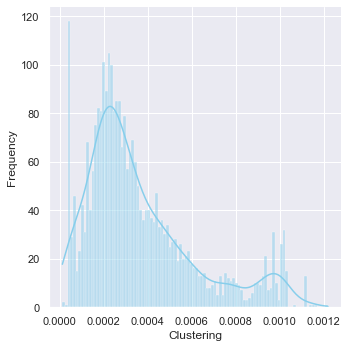

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})
ax=sns.displot(dataFrameClu['clustering coeficient'],
              bins=100,
              kde=True,
              color='skyblue')
ax.set(xlabel='Clustering', ylabel='Frequency')

In [48]:
print(f'Maksimalni stepen klasterisanja:')
print(dataFrameClu.sort_values('clustering coeficient', ascending=False).head(1))

Maksimalni stepen klasterisanja:
        subreddit  clustering coeficient
502  Plugyoursite                0.00122


In [49]:
print(f'Globalni koeficijent klasterisanja:')
print(nx.transitivity(GSNet))

Globalni koeficijent klasterisanja:
0.26455544014478105


### Upoređivanje sa ER mrežom ###

In [50]:
n=GSNet.number_of_nodes()
m=GSNet.number_of_edges()

In [53]:
p=(2*float(m))/(n*(n-1))  #p=2*m/(n*(n-1)), p je verovatnoca formiranja grane takva da je ocekivani broj grana m
print(p)
er=nx.erdos_renyi_graph(n,p)
delta_m=m-er.number_of_edges()
print(f"Broj grana originalne mreže minus broj grana u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

0.01559630320226624
Broj grana originalne mreže minus broj grana u ER mreži iznosi 717, što je odstupanje od 0.5278696007479993%


In [55]:
subredit1, clustering_coef1=zip(*nx.clustering(er, weight='weight').items())
nenula=[(sub, cc) for sub, cc in zip(subredit1, clustering_coef1) if cc>0]

dataFrameClu1=pd.DataFrame(nenula, columns=['subreddit','clustering coeficient'])
dataFrameClu1.sort_values('clustering coeficient', inplace=True)
prosecni_stepen_klasterisanja1=nx.average_clustering(er)
print(f'Prosečan stepen klasterisanja ER mreže:{prosecni_stepen_klasterisanja1}')
print('Lokalni stepeni klasterisanja ER mreže:')
print(dataFrameClu1)
print(f'Maksimalni stepen klasterisanja ER mreže:')
print(dataFrameClu1.sort_values('clustering coeficient', ascending=False).head(1))
print(f'Globalni koeficijent klasterisanja ER mreže:')
print(nx.transitivity(er))

Prosečan stepen klasterisanja ER mreže:0.015526821814303962
Lokalni stepeni klasterisanja ER mreže:
      subreddit  clustering coeficient
554         554               0.006289
1328       1328               0.006429
278         278               0.006803
3564       3564               0.007237
2640       2640               0.007519
...         ...                    ...
3944       3944               0.025298
116         116               0.025325
2685       2685               0.026939
2442       2442               0.027119
3800       3800               0.027569

[4174 rows x 2 columns]
Maksimalni stepen klasterisanja ER mreže:
      subreddit  clustering coeficient
3800       3800               0.027569
Globalni koeficijent klasterisanja ER mreže:
0.015528730943907628


In [63]:
er_gcc=nx.transitivity(er)
gcc=nx.transitivity(GSNet)

In [64]:
tabela=pd.DataFrame([(prosecni_stepen_klasterisanja, prosecni_stepen_klasterisanja1,
                     max(clustering_coef),
                     max(clustering_coef1), gcc, er_gcc)],
                    columns=['ACC','ACC-ER','LCC','LCC-ER','GCC','GCC-ER'])
print(tabela)

        ACC    ACC-ER      LCC    LCC-ER       GCC    GCC-ER
0  0.619569  0.015527  0.00122  0.027569  0.264555  0.015529


In [69]:
print(nx.diameter(er))  #ovde je manji dijametar nego kod realne mreze, tu detektujemo da je mali svet

3


In [70]:
print(nx.average_shortest_path_length(er))

2.345025652048656


## Fenomen malog sveta

In [3]:
import numpy as np

Za fenomen malog sveta realne mreže, potrebno je da budu zadovoljeni uslovi:
1. mala prosečna distanca dva čvora u mreži u odnosu na veličinu mreže: lnetwork~ln(n)/ln(d)
2. visoki globalni koeficijent klasterisanja u odnosu na globalni koeficijent klasterisanja kod ER mreže: Cn>>Cer

In [4]:
lnN=np.log(len(GSNet.nodes()))
print(lnN)
d=len(GSNet.edges())/len(GSNet.nodes())
lnd=np.log(d)
print(lnd)
print(lnN/lnd) 

8.336630087637147
3.4825219330084334
2.393848552286191


Prosečna udaljenost bilo koja dva čvora u mreži SNet je 2.1074294899060666~2.393848552286191, a globalni stepen klasterizacije je 0.26455544014478105, što je mnogo veće od globalnog koeficijenta klasterizacije ER mreže (0.015529), to je ostvaren fenomen malog sveta.

## Asortativnost

In [7]:
r1=nx.degree_assortativity_coefficient(GSNet)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}") #radi

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: -0.42837443348403276


Mreža je disasortativna, čvorovi nemaju tendenciju da se vezuju sa čvorovima sličnog stepena.

In [ ]:
r2=nx.degree_assortativity_coefficient(GSNet, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}") #zasto prijavljuje gresku

Izvršavanjem ovog koda treba da se prikaže -0.0390796889 (kod kolege)

Mreža je disasortativna, čvorovi nemaju tendenciju da se vezuju sa čvorovima sličnog stepena.

## Fenomen kluba bogatih

In [ ]:
rich_club_coef=nx.rich_club_coefficient(GSNet)

Čvorovi nemaju tendenciju da se vezuju međusobno, pogotovo da ne mogu da se vezuju sa čvorovima većeg stepena, jer smo zaključili da je mreža disasortitvna.

## Power-law distribucija 

In [78]:
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees) #raspakovanje
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())     #x-stepen, y-broj cvorova koji imaju odredjeni stepen                                                 

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({0: 771, 1: 547, 2: 258, 3: 136, 5: 96, 4: 82, 6: 65, 7: 57, 11: 53, 16: 46, 21: 43, 10: 41, 8: 38, 23: 37, 20: 35, 14: 35, 9: 35, 24: 32, 13: 31, 33: 30, 43: 30, 17: 29, 19: 28, 22: 28, 12: 28, 28: 27, 18: 25, 26: 22, 29: 21, 27: 21, 40: 20, 34: 19, 42: 18, 47: 17, 31: 17, 76: 17, 15: 17, 38: 16, 36: 16, 25: 15, 110: 15, 50: 14, 59: 14, 30: 14, 39: 14, 35: 13, 55: 13, 32: 13, 78: 12, 58: 11, 45: 11, 49: 11, 63: 11, 41: 11, 69: 11, 77: 10, 61: 10, 56: 10, 37: 10, 72: 10, 54: 10, 51: 10, 52: 9, 48: 9, 91: 9, 87: 9, 83: 9, 108: 9, 88: 8, 53: 8, 79: 8, 74: 8, 60: 8, 151: 7, 57: 7, 68: 7, 114: 7, 96: 7, 67: 7, 146: 6, 104: 6, 105: 6, 64: 6, 71: 6, 115: 6, 94: 6, 70: 6, 107: 6, 150: 6, 66: 5, 191: 5, 106: 5, 73: 5, 62: 5, 93: 5, 163: 5, 103: 5, 177: 5, 160: 5, 132: 5, 97: 5, 44: 5, 80: 5, 271: 4, 98: 4, 167: 4, 112: 4, 101: 4, 207: 4, 86: 4, 305: 4, 161: 4, 266: 4, 99: 4, 135: 4, 158: 4, 154: 4, 102: 4, 116: 4, 113: 4, 118: 4, 119: 4, 196: 4, 95: 4, 92: 4, 65: 4, 130: 3, 187: 3, 165

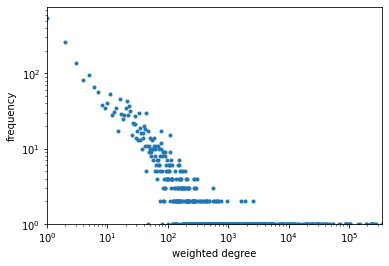

In [79]:
plot_deg_frequency(GSNet, True)

Navedena distribucija čvorova po težinskom stepenu prati power-law raspodelu, jer većina čvorova ima samo nekoliko veza (ima 258 čvorova čiji je stepen 2), a neki čvorovi imaju veliki broj veza (vidimo da ima po jedan čvor kod većih stepena).

## Habovi i autoriteti

In [7]:
#hubs_authorities=nx.hits(G) #SNet mreza je neusmerena, pa ne mogu se odrediti habovi i autoriteti

## Analiza mera centralnosti ##

1) Centralnosti po stepenu, bliskosti, relacionoj centralnosti 2) Centralnosti po sopstvenom vektoru

In [19]:
DC_dict=nx.degree_centrality(GSNet)

In [20]:
CC_dict=nx.closeness_centrality(GSNet)

In [21]:
BC_dict=nx.betweenness_centrality(GSNet) #predugo

In [22]:
EVC_dict = nx.eigenvector_centrality(GSNet)

In [23]:
df1=pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
df2=pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
df3=pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
df4=pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
df=pd.concat([df1, df2, df3, df4], axis=1)
print(df)

                           DC        CC        BC           EVC
askXKCD              0.058231  0.411201  0.000021  3.174183e-02
AmericanEconomy      0.041457  0.405722  0.000015  2.293013e-02
electronics          0.040978  0.406270  0.000013  2.394732e-02
Boxing               0.000479  0.334472  0.000000  4.841689e-04
nyc                  0.074527  0.414852  0.000045  3.681242e-02
...                       ...       ...       ...           ...
emerfv               0.000000  0.000000  0.000000  7.406188e-38
freebies             0.009825  0.393471  0.000002  6.869581e-03
Zinemaya             0.000000  0.000000  0.000000  7.406188e-38
flash                0.031632  0.402708  0.000004  1.966611e-02
vitaminsforhairloss  0.000240  0.300036  0.000000  2.101206e-04

[4174 rows x 4 columns]


In [29]:
with open("data1/snet-centralities", 'wb') as file:
    pickle.dump(df, file)

### Centralnost po stepenu ###

In [24]:
df_dc = pd.DataFrame({'DC':df['DC']})
df_dc.sort_values(by='DC', ascending=False, inplace = True)
print(df_dc.head(10))

                     DC
reddit.com     0.715313
politics       0.491253
technology     0.491014
pics           0.482147
funny          0.469686
science        0.466092
entertainment  0.457225
worldnews      0.455787
programming    0.451474
WTF            0.450515


### Centralnost po bliskosti ###

In [25]:
df_cc = pd.DataFrame({'CC':df['CC']})
df_cc.sort_values(by='CC', ascending=False, inplace = True)
print(df_cc.head(10))

                     CC
reddit.com     0.723885
technology     0.577996
politics       0.577504
pics           0.572744
funny          0.566282
science        0.564513
entertainment  0.560427
worldnews      0.559848
programming    0.556972
WTF            0.556857


### Relaciona centralnost ###

In [26]:
df_bc = pd.DataFrame({'BC':df['BC']})
df_bc.sort_values(by='BC', ascending=False, inplace = True)
print(df_bc.head(10))

                     BC
reddit.com     0.248238
technology     0.032099
programming    0.029720
politics       0.028440
business       0.026804
pics           0.025292
entertainment  0.024747
worldnews      0.021746
funny          0.021245
science        0.020711


### Centralnost po sopstvenom vektoru ###

In [27]:
df_ec = pd.DataFrame({'EVC':df['EVC']})
df_ec.sort_values(by='EVC', ascending=False, inplace = True)
print(df_ec.head(10))

                    EVC
reddit.com     0.090803
politics       0.088296
pics           0.088055
technology     0.088023
funny          0.087865
science        0.087807
WTF            0.086766
worldnews      0.086591
entertainment  0.086574
programming    0.085534


In [119]:
with open("data1/snet-centralities", 'rb') as file:
    df = pickle.load(file)

### Kacova centralnost ###

In [120]:
import pickle
with open("data1/katz_b=1000", 'rb') as file:
    df_katz = pickle.load(file)

In [121]:
print(df_katz.sort_values(by='EVC', ascending=False).head(10))

                    EVC  EVC_rank
reddit.com     0.329250       1.0
politics       0.271542       2.0
pics           0.251967       3.0
funny          0.242301       4.0
science        0.236767       5.0
technology     0.229616       6.0
worldnews      0.223856       7.0
WTF            0.219809       8.0
entertainment  0.219209       9.0
programming    0.191733      10.0


## Korelacija metrika centralnosti ##

In [122]:
df_correlation=pd.merge(df, df_katz, left_index=True, right_index=True)
df_correlation.rename(columns = {'EVC_x':'EVC', 'EVC_y':'KatzC'}, inplace = True)
df_correlation=df_correlation.drop(['EVC_rank'], axis=1)
print(df_correlation)

                           DC        CC        BC           EVC     KatzC
askXKCD              0.058231  0.411201  0.000021  3.174183e-02  0.008168
AmericanEconomy      0.041457  0.405722  0.000015  2.293013e-02  0.007440
electronics          0.040978  0.406270  0.000013  2.394732e-02  0.007720
Boxing               0.000479  0.334472  0.000000  4.841689e-04  0.007340
nyc                  0.074527  0.414852  0.000045  3.681242e-02  0.008109
...                       ...       ...       ...           ...       ...
emerfv               0.000000  0.000000  0.000000  7.406188e-38  0.007338
freebies             0.009825  0.393471  0.000002  6.869581e-03  0.007363
Zinemaya             0.000000  0.000000  0.000000  7.406188e-38  0.007338
flash                0.031632  0.402708  0.000004  1.966611e-02  0.007490
vitaminsforhairloss  0.000240  0.300036  0.000000  2.101206e-04  0.007338

[4174 rows x 5 columns]


In [124]:
labele=['DC','CC','BC', 'EVC', 'KatzC']
matrica_korelacije=pd.DataFrame(columns=['DC','CC','BC','EVC','KatzC'], index=['DC','CC','BC','EVC','KatzC'])
p_val_matrica=pd.DataFrame(columns=['DC','CC','BC','EVC','KatzC'], index=['DC','CC','BC','EVC','KatzC'])

for i in labele:
    for j in labele:
        matrica_korelacije[i][j], p_val_matrica[i][j]=stats.kendalltau(df_correlation[i], df_correlation[j])
        
print(matrica_korelacije)
print(p_val_matrica) 

             DC        CC        BC       EVC     KatzC
DC          1.0  0.911388  0.610459  0.945049  0.893629
CC     0.911388       1.0  0.589645  0.947764   0.93323
BC     0.610459  0.589645       1.0  0.586258  0.613248
EVC    0.945049  0.947764  0.586258       1.0  0.931821
KatzC  0.893629   0.93323  0.613248  0.931821       1.0
        DC   CC   BC  EVC KatzC
DC     0.0  0.0  0.0  0.0   0.0
CC     0.0  0.0  0.0  0.0   0.0
BC     0.0  0.0  0.0  0.0   0.0
EVC    0.0  0.0  0.0  0.0   0.0
KatzC  0.0  0.0  0.0  0.0   0.0


## Kompozitna mera centralnosti ##

In [125]:
df_ = df_correlation
for metric in labele:
    df_[f"{metric}_rank"] = df_correlation[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank']* df_['KatzC_rank'] #composite_rank=dc_rank*cc_rank*bc_rank*evc_rank*katz_rank

df_=df_.sort_values(['composite_rank'], ascending = True)
print(df_.head(10))

                     DC        CC        BC       EVC     KatzC  DC_rank  \
reddit.com     0.715313  0.723885  0.248238  0.090803  0.329250      1.0   
politics       0.491253  0.577504  0.028440  0.088296  0.271542      2.0   
technology     0.491014  0.577996  0.032099  0.088023  0.229616      3.0   
pics           0.482147  0.572744  0.025292  0.088055  0.251967      4.0   
funny          0.469686  0.566282  0.021245  0.087865  0.242301      5.0   
science        0.466092  0.564513  0.020711  0.087807  0.236767      6.0   
programming    0.451474  0.556972  0.029720  0.085534  0.191733      9.0   
entertainment  0.457225  0.560427  0.024747  0.086574  0.219209      7.0   
worldnews      0.455787  0.559848  0.021746  0.086591  0.223856      8.0   
WTF            0.450515  0.556857  0.017729  0.086766  0.219809     10.0   

               CC_rank  BC_rank  EVC_rank  KatzC_rank  composite_rank  
reddit.com         1.0      1.0       1.0         1.0             1.0  
politics           

## Detekcija komuna ##

### Hijerarhijsko klasterisanje

In [7]:
import itertools
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [ ]:
comp=nx.community.girvan_newman(GSNet)
k=15
hierarchical_decomposition={}
i=2
for communities in itertools.islice(comp, k):
    hierarchical_decomposition[i]=tuple(sorted(c) for c in communities)
    i=i+1  #dugo traje

In [ ]:
def print_decomposition(hierarchy, num_clusters):
    decomposition_tupple = hierarchy[num_clusters]
    print(f"Dekompozicija na {num_clusters} komuna")
    for com_ind in range(num_clusters):
        print(f"Komuna {com_ind+1} ima {len(decomposition_tupple[com_ind])} clanova")
        print(decomposition_tupple[com_ind])
        print("-----------------------------------------------------------------------")

In [ ]:
print_decomposition(hierarchical_decomposition, 3)

In [3]:
def plot_and_save_dendrogram(G):

    plt.rcParams["figure.figsize"] = (24,13)
    # get Girvan-Newman communities list
    communities = list(nx.community.girvan_newman(G))

    # building initial dict of node_id to each possible subset:
    node_id = 0
    init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
    for comm in communities:
        for subset in list(comm):
            if subset not in init_node2community_dict.values():
                node_id += 1
                init_node2community_dict[node_id] = subset

    # turning this dictionary to the desired format in @mdml's answer
    node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
    for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
        for node_id_parent, group in init_node2community_dict.items():
            if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
                node_id_to_children[node_id_parent].append(node_id1)
                node_id_to_children[node_id_parent].append(node_id2)

    # also recording node_labels dict for the correct label for dendrogram leaves
    node_labels = dict()
    for node_id, group in init_node2community_dict.items():
        if len(group) == 1:
            node_labels[node_id] = list(group)[0]
        else:
            node_labels[node_id] = ''

    # also needing a subset to rank dict to later know within all k-length merges which came first
    subset_rank_dict = dict()
    rank = 0
    for e in communities[::-1]:
        for p in list(e):
            if tuple(p) not in subset_rank_dict:
                subset_rank_dict[tuple(sorted(p))] = rank
                rank += 1
    subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

    # my function to get a merge height so that it is unique (probably not that efficient)
    def get_merge_height(sub):
        sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
        n = len(sub_tuple)
        other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
        min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
        range = (max_rank-min_rank) if max_rank > min_rank else 1
        return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

    # finally using @mdml's magic, slightly modified:
    G           = nx.DiGraph(node_id_to_children)
    nodes       = G.nodes()
    leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
    inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

    # Compute the size of each subtree
    subtree = dict( (n, [n]) for n in leaves )
    for u in inner_nodes:
        children = set()
        node_list = list(node_id_to_children[u])
        while len(node_list) > 0:
            v = node_list.pop(0)
            children.add( v )
            node_list += node_id_to_children[v]
        subtree[u] = sorted(children & leaves)

    inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

    # Construct the linkage matrix
    leaves = sorted(leaves)
    index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
    Z = []
    k = len(leaves)
    for i, n in enumerate(inner_nodes):
        children = node_id_to_children[n]
        x = children[0]
        for y in children[1:]:
            z = tuple(sorted(subtree[x] + subtree[y]))
            i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
            Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
            index[z] = k
            subtree[z] = list(z)
            x = z
            k += 1

    # dendrogram
    plt.figure()
    dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
    plt.savefig('dendrogram.png')

In [ ]:
plot_and_save_dendrogram(Gdom)

## Spektralno klasterisanje

In [7]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from docx import Document
import math #?
import sympy
from sklearn.cluster import SpectralClustering

In [8]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{title}.svg")
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"etf/{file_name}.svg")
    plt.show() 

In [9]:
def find_ccs2(eigenvectors_holder, n):
    components = []
    already_solved = []
    for current in range(0, n):
        if current not in already_solved:
            component = [current]
            for running in range (current+1, n):
                if running not in already_solved:
                    b = True
                    for tracer in range(0, len(eigenvectors_holder)):
                        eigenvector = eigenvectors_holder[tracer]
                        if not in_range(eigenvector[current], eigenvector[running], math.pow(10,-12)):
                            b = False
                    if b:
                        component.append(running)
                        already_solved.append(running)
            already_solved.append(current)
            components.append(component)
    return components

In [10]:
def get_components3(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    return find_ccs2(eigenspace0_basis, len(eigenspace0_basis[0]))

In [ ]:

# read the multigraph
#G = GSNet
# create weighted graph G2 from multigraph G
G2 = nx.Graph()
for u,v,data in GSNet.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G2.has_edge(u,v):
        G2[u][v]['weight'] += w
    else:
        G2.add_edge(u, v, weight=w)

zaposleni_multigraf = set(G2.nodes)

print("Izolovani cvorovi:")
for z in GSNet.nodes:
    if z not in zaposleni_multigraf:
        G2.add_node(z)
        print(z)


#print(G2.edges(data=True))

#nx.write_pajek(G2, "etf/agregirano_etf.net")
# [(1, 2, {'weight': 26}), (2, 3, {'weight': 42})]

C:\Users\Sandra\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1097: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


     k      lambda_k
0    1 -1.252071e-13
1    2 -1.063022e-13
2    3 -1.292931e-14
3    4 -1.292931e-14
4    5 -4.519331e-16
5    6 -2.218050e-16
6    7 -1.646996e-16
7    8  0.000000e+00
8    9  0.000000e+00
9   10  0.000000e+00
10  11  0.000000e+00
11  12  0.000000e+00
12  13  0.000000e+00
13  14  0.000000e+00
14  15  0.000000e+00
15  16  0.000000e+00
16  17  0.000000e+00
17  18  0.000000e+00
18  19  0.000000e+00
19  20  0.000000e+00
20  21  0.000000e+00
21  22  0.000000e+00
22  23  0.000000e+00
23  24  0.000000e+00
24  25  0.000000e+00
25  26  0.000000e+00
26  27  0.000000e+00
27  28  0.000000e+00
28  29  0.000000e+00
29  30  0.000000e+00


C:\Users\Sandra\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


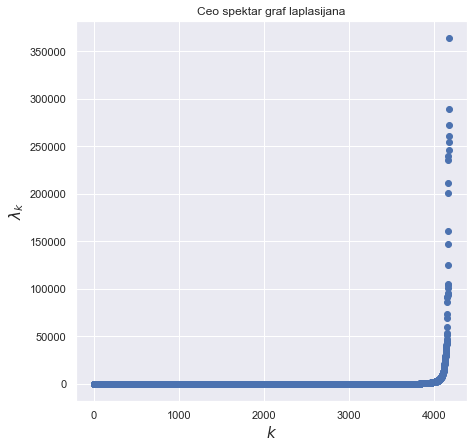

In [12]:

L = nx.laplacian_matrix(G2).toarray()

eigenvalues = linalg.eigvals(L) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

#doc = Document()
doc = Document('etf/tabela_eig1.docx')
t = doc.add_table(df_eig30.shape[0]+1, df_eig30.shape[1])
t.cell(0,0).text = r'$k$'
t.cell(0,1).text = r'$\lambda_k$'
for i in range(df_eig30.shape[0]):
    for j in range(df_eig30.shape[-1]):
        t.cell(i+1,j).text = str(df_eig30.values[i,j])
doc.save('etf/tabela_eig1.docx')




plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana')

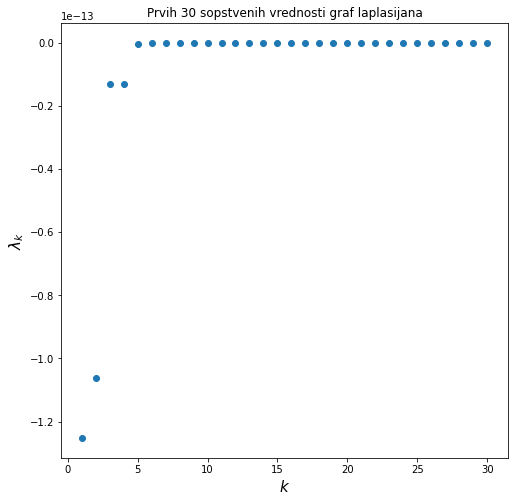

In [23]:
# prvih 30 sopstvenih vrednosti

df_eig_30 = df_eig[:30]

plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana')


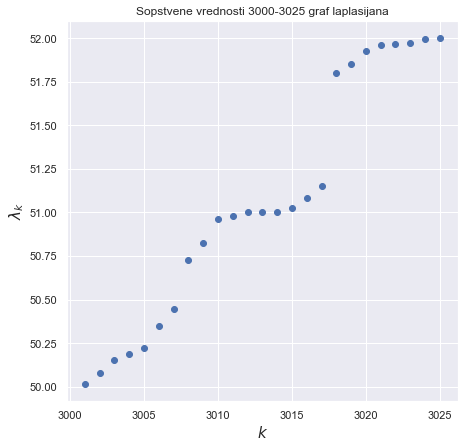

In [15]:
# prvih 30 sopstvenih vrednosti

df_eig_34 = df_eig[3000:3025]

plot_scatterplot(df_eig_34.iloc[:,0], df_eig_34.iloc[:,1], r'$k$', r'$\lambda_k$', 'Sopstvene vrednosti 3000-3025 graf laplasijana')


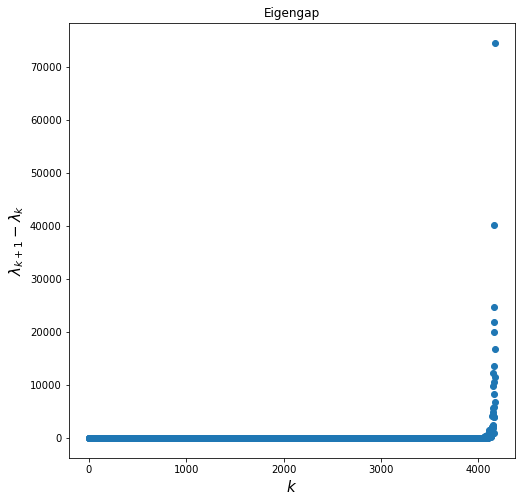

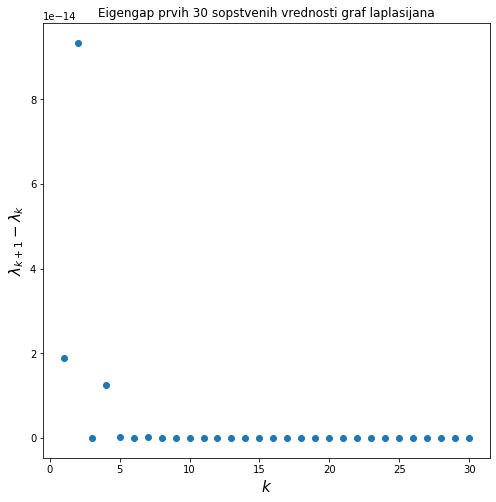

In [31]:
# eigengap


df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap')

plot_scatterplot(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti graf laplasijana')

In [16]:
def get_components2(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 
    #eigenspace0_basis = filter_matrix(eigenspace0_basis, math.pow(10, -15)) # filter values close to 0

    #print("EVM:")
    #EV_mat = np.array(list(eigenspace0_basis)).T
    #print(pd.DataFrame(EV_mat))
    
    IV_rref, _ = sympy.Matrix(eigenspace0_basis).rref()
    print(IV_rref)
    
    
    # transformation into indicator vectors
    #indicator_vector_container = []
    #for eigenvector in eigenspace0_basis:
        
    #    max_component = max([abs(c) for c in eigenvector])
    #    indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
    #    indicator_vector_container.append(indicator_vector)
    
    #print("Indicator vector matrix:")
    IV_mat = np.array(IV_rref).T
    #print(pd.DataFrame(IV_mat))
        
    components = []
    IV_rref = np.array(IV_rref)
    for iv in IV_rref:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components

In [17]:
def in_range(value, target, tolerated_error):
    return abs(value-target) < tolerated_error

def filter_matrix(m, tolerated_error):
    new_matrix = []
    for row in m:
        new_row = []
        for value in row:
            if in_range(0 , value, tolerated_error):
                new_row.append(0.0)
            else:
                new_row.append(value)
        new_matrix.append(new_row)
    return new_matrix

def get_components(L, component_number):
    
    evals, evecs = linalg.eig(L) # each column of evecs is an eigenvector

    # take only real component of each eigenvalue, because eigenvalues of L are guaranteed to be real 
    evals = evals.real

    # take only real component of each eigenvector, because eigenvectors of L are guaranteed to be real 
    evecs_temp = []
    for e in evecs:
        v = e.real
        evecs_temp.append(v)    
    evecs = evecs_temp
    
    evecs_horizontal_container = np.array(evecs).T #each row is an eigenvector

    zipped = list(zip(evals, evecs_horizontal_container)) # pair eigenvalues and eigenvectors into eigenpairs
    zipped.sort(key=lambda tup: tup[0]) # sort eigenpairs by eigenvalue
    evals, evecs = zip(*zipped) # evecs is now horizontal, but ordered by paired eigenvalue size
    eigenspace0_basis = evecs[:component_number] # take only the first component_number eigenvectors 


    print("EVM:")
    EV_mat = np.array(list(eigenspace0_basis)).T
    print(pd.DataFrame(EV_mat))
    
    # transformation into indicator vectors
    indicator_vector_container = []
    for eigenvector in eigenspace0_basis:
        
        max_component = max([abs(c) for c in eigenvector])
        indicator_vector = [abs(c/max_component) for c in eigenvector] # normalization to 1's and 0's
        indicator_vector_container.append(indicator_vector)
    
    print("Indicator vector matrix:")
    IV_mat = np.array(indicator_vector_container).T
    print(pd.DataFrame(IV_mat))
        
    components = []
    for iv in indicator_vector_container:
        component = []
        for i, c in enumerate(iv):
            if in_range(c, 1.0, math.pow(10, -12)):
                component.append(i)
        components.append(component)
    
    return components


In [ ]:
#test
W = [[0,0,0,0,0,0], [0,0,1,0,0,0,], [0,1,0,0,0,0,], [0,0,0,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]]
D = np.diag([0,1,1,2,2,2])
Test_L = D - np.array(W)
get_components3(Test_L,3)

In [18]:
# partition G2 to components
components = get_components3(L, 21)

#print(components)
component_sizes = [len(c) for c in components]
print(component_sizes)
print(sum(component_sizes))
zipped = list(zip(component_sizes, components)) # pair component sizes and components
zipped.sort(key=lambda tup: tup[0], reverse = True) # sort pairs by component size
component_sizes, components = zip(*zipped) 
#print(component_sizes)
#print(sum(component_sizes))

dominant_component_indexes = components[0]

dominant_component_labels = []
for i, label in enumerate(list(G2.nodes())):
    if i in dominant_component_indexes:
        dominant_component_labels.append(label)

#print(dominant_component_indexes)
#print(dominant_component_labels)

[3364, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 758]
4174


In [20]:
dominant_component = G2.subgraph(dominant_component_labels)
for k in range(2, 30):
    
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(dominant_component))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G = nx.Graph()
    for c, label in zip(c_string, dominant_component.nodes()):
        G.add_node(label, color=c)

    for edge in dominant_component.edges(data=True):
        #print(edge)
        G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    # nx.write_pajek(G, "etf/spectral3.net")
    #nx.write_gml(G, f"etf/spectral/spectral{k}.gml")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes.astype(int)}")

Podela na 2: velicine komponenata su [3361    3]
Podela na 3: velicine komponenata su [3308    3   53]
Podela na 4: velicine komponenata su [3303    3    5   53]
Podela na 5: velicine komponenata su [3296    3    7    5   53]
Podela na 6: velicine komponenata su [3291    3    5    7    5   53]
Podela na 7: velicine komponenata su [3285    3    5    7    5    6   53]
Podela na 8: velicine komponenata su [3281    4    3    5    7    5    6   53]
Podela na 9: velicine komponenata su [3268    4    3    5    7    5    6   13   53]
Podela na 10: velicine komponenata su [3268    4    3    3    5    7    5    6   53   10]
Podela na 11: velicine komponenata su [3268    4    3    3    5    7    5    6    3   53    7]
Podela na 12: velicine komponenata su [3253    4    3    3    5    7    5    6   15    7   53    3]
Podela na 13: velicine komponenata su [3253    4    3    3    5    7    5    3    6    3   15    4   53]
Podela na 14: velicine komponenata su [3235   14    4    3    3    5    4    7

## Louvain metod

Ako je postavljena rezolucija 1.0

In [3]:
df_mod1 = pd.read_csv("data1/modularnost1.csv")
print(df_mod1)

        Id                Label  timeset  modularity_class
0        0              askXKCD      NaN               491
1        1      AmericanEconomy      NaN               491
2        2          electronics      NaN               491
3        3               Boxing      NaN               666
4        4                  nyc      NaN               491
...    ...                  ...      ...               ...
4169  4169               emerfv      NaN               843
4170  4170             freebies      NaN               491
4171  4171             Zinemaya      NaN               844
4172  4172                flash      NaN               491
4173  4173  vitaminsforhairloss      NaN               491

[4174 rows x 4 columns]


In [9]:
df_grupisi_mod=df_mod1.groupby('modularity_class')
data_agregiraj=df_grupisi_mod['Label'].agg(broj_sabredit=np.size)
print(data_agregiraj.sort_values(ascending=False, by='broj_sabredit')[0:10])

                  broj_sabredit
modularity_class               
491                        1669
666                        1361
52                          106
152                          26
178                          14
608                          14
531                          10
834                           9
720                           7
661                           7


In [12]:
print(df_mod1[df_mod1['modularity_class']==491].head(20))

    Id            Label  timeset  modularity_class
0    0          askXKCD      NaN               491
1    1  AmericanEconomy      NaN               491
2    2      electronics      NaN               491
4    4              nyc      NaN               491
14  14              god      NaN               491
17  17             eric      NaN               491
18  18         shenzhen      NaN               491
21  21            wrong      NaN               491
22  22      PrideNation      NaN               491
29  29  AlternativeHair      NaN               491
33  33         AsiaTalk      NaN               491
36  36            sport      NaN               491
39  39             love      NaN               491
40  40    consciousness      NaN               491
44  44          Britain      NaN               491
46  46     gratefuldead      NaN               491
50  50          ireland      NaN               491
54  54  radiofreereddit      NaN               491
59  59         Military      Na

In [13]:
print(df_mod1[df_mod1['modularity_class']==666].head(20))

    Id             Label  timeset  modularity_class
3    3            Boxing      NaN               666
7    7             panda      NaN               666
8    8             Bamze      NaN               666
10  10       getrealtest      NaN               666
13  13              Debt      NaN               666
15  15            suceel      NaN               666
23  23      techinhiding      NaN               666
25  25          Eienelle      NaN               666
30  30     arbejdsglaede      NaN               666
31  31          trustart      NaN               666
41  41              y2cl      NaN               666
42  42           usuiela      NaN               666
43  43     Nurse_dot_com      NaN               666
51  51       Vanhomeless      NaN               666
52  52  DigitalDisasters      NaN               666
55  55               ltr      NaN               666
58  58          terrible      NaN               666
61  61   mytestreddittwo      NaN               666
64  64    Go

Ako je postavljena rezolucija 1.2

In [17]:
df_mod1_2 = pd.read_csv("data1/modularnost1.2.csv")
print(df_mod1_2)

        Id                Label  timeset  modularity_class
0        0              askXKCD      NaN               278
1        1      AmericanEconomy      NaN               278
2        2          electronics      NaN               278
3        3               Boxing      NaN               243
4        4                  nyc      NaN               278
...    ...                  ...      ...               ...
4169  4169               emerfv      NaN               829
4170  4170             freebies      NaN               278
4171  4171             Zinemaya      NaN               830
4172  4172                flash      NaN               278
4173  4173  vitaminsforhairloss      NaN               278

[4174 rows x 4 columns]


In [18]:
df_grupisi_mod=df_mod1_2.groupby('modularity_class')
data_agregiraj=df_grupisi_mod['Label'].agg(broj_sabredit=np.size)
print(data_agregiraj.sort_values(ascending=False, by='broj_sabredit')[0:10])

                  broj_sabredit
modularity_class               
278                        1579
243                        1549
513                          53
137                          23
487                          18
530                          13
532                          10
534                           9
820                           9
659                           7


In [21]:
print(df_mod1_2[df_mod1_2['modularity_class']==278].head(20))

    Id            Label  timeset  modularity_class
0    0          askXKCD      NaN               278
1    1  AmericanEconomy      NaN               278
2    2      electronics      NaN               278
4    4              nyc      NaN               278
11  11             ajax      NaN               278
14  14              god      NaN               278
18  18         shenzhen      NaN               278
22  22      PrideNation      NaN               278
24  24        runetnews      NaN               278
29  29  AlternativeHair      NaN               278
33  33         AsiaTalk      NaN               278
36  36            sport      NaN               278
37  37    searchengines      NaN               278
39  39             love      NaN               278
40  40    consciousness      NaN               278
44  44          Britain      NaN               278
46  46     gratefuldead      NaN               278
50  50          ireland      NaN               278
54  54  radiofreereddit      Na

In [20]:
print(df_mod1_2[df_mod1_2['modularity_class']==243].head(20))

    Id             Label  timeset  modularity_class
3    3            Boxing      NaN               243
5    5           bertels      NaN               243
7    7             panda      NaN               243
8    8             Bamze      NaN               243
10  10       getrealtest      NaN               243
13  13              Debt      NaN               243
15  15            suceel      NaN               243
17  17              eric      NaN               243
21  21             wrong      NaN               243
23  23      techinhiding      NaN               243
25  25          Eienelle      NaN               243
30  30     arbejdsglaede      NaN               243
31  31          trustart      NaN               243
34  34      radiocontrol      NaN               243
41  41              y2cl      NaN               243
42  42           usuiela      NaN               243
43  43     Nurse_dot_com      NaN               243
51  51       Vanhomeless      NaN               243
52  52  Digi

Ako je rezolucija 5

In [26]:
df_mod5 = pd.read_csv("data1/modularnost5.csv")
df_grupisi_mod=df_mod5.groupby('modularity_class')
data_agregiraj=df_grupisi_mod['Label'].agg(broj_sabredit=np.size)
print(data_agregiraj.sort_values(ascending=False, by='broj_sabredit')[0:10])

                  broj_sabredit
modularity_class               
229                        3364
288                           3
672                           3
108                           3
464                           2
217                           2
365                           2
321                           2
754                           2
325                           2


In [27]:
print(df_mod5[df_mod5['modularity_class']==229].head(20))

    Id            Label  timeset  modularity_class
0    0          askXKCD      NaN               229
1    1  AmericanEconomy      NaN               229
2    2      electronics      NaN               229
3    3           Boxing      NaN               229
4    4              nyc      NaN               229
5    5          bertels      NaN               229
7    7            panda      NaN               229
8    8            Bamze      NaN               229
10  10      getrealtest      NaN               229
11  11             ajax      NaN               229
13  13             Debt      NaN               229
14  14              god      NaN               229
15  15           suceel      NaN               229
17  17             eric      NaN               229
18  18         shenzhen      NaN               229
20  20          Descary      NaN               229
21  21            wrong      NaN               229
22  22      PrideNation      NaN               229
23  23     techinhiding      Na

In [28]:
print(df_mod5[df_mod5['modularity_class']==288].head(20))

        Id            Label  timeset  modularity_class
471    471     CarpetRepair      NaN               288
1625  1625   CarpetCleaning      NaN               288
3477  3477  AirDuctCleaning      NaN               288


## Mostovi

In [75]:
mostovi=nx.bridges(GSNet)
mostovi=list(mostovi)
print(mostovi)

[('Debt', 'reddit.com'), ('shenzhen', 'China'), ('PrideNation', 'lgbt'), ('love', 'relationships'), ('usuiela', 'reddit.com'), ('Nurse_dot_com', 'reddit.com'), ('Labour', 'DigitalDivide'), ('Vanhomeless', 'reddit.com'), ('bdcburma', 'reddit.com'), ('tr', 'Hepsi'), ('tr', 'abandoned'), ('littlestar', 'PlanetaCiencia'), ('techdorks', 'programming'), ('psyapsy', 'reddit.com'), ('testname', 'reddit.com'), ('InTraser', 'reddit.com'), ('sub', 'reddit.com'), ('Haknit', 'reddit.com'), ('crownedregal', 'reddit.com'), ('davebenzList', 'reddit.com'), ('CassandraTroy', 'reddit.com'), ('FAIRFederation', 'politics'), ('ZinioBest', 'bushlegacyproject'), ('Rickey', 'reddit.com'), ('matija', 'reddit.com'), ('terryly', 'Chinese'), ('GrabberOrange', 'reddit.com'), ('editgrid', 'programming'), ('getdomain', 'reddit.com'), ('ads', 'fundoo'), ('ads', 'mobwisdom'), ('consultingblog', 'reddit.com'), ('bigjimslade', 'cheats'), ('Jawad', 'reddit.com'), ('Alexanderc', 'business'), ('BDJobs', 'reddit.com'), ('Rad

## Poređenje SNet i SNetT

In [ ]:
print(nx.periphery(Gdom))

In [ ]:
core_Num=nx.core_number(Gdom)
print(core_Num)

In [ ]:
snet_t={'reddit.com', 'pics', 'worldnews', 'programming',
'business', 'politics', 'obama', 'science', 'technology', 'WTF', 
'AskReddit', 'netsec', 'philosophy', 'videos', 'offbeat',
'funny', 'entertainment', 'linux', 'geek', 'gaming', 'comics', 'gadgets', 'nsfw', 
'news', 'environment', 'atheism','canada', 'math', 'Economics', 'scifi', 
'bestof', 'cogsci', 'joel', 'Health', 'guns', 'photography', 'software', 'history',
'ideas'}
for i in snet_t:
    print(core_Num[i]) #nakon pokretanja ove komande, prikazuju se isti brojevi jezgra kom ti čvorovi pripadaju

In [ ]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
img = mpimg.imread('SNetT u SNet.png')
imgplot = plt.imshow(img)
plt.show()
img = mpimg.imread('SNetT u SNet1.png')
imgplot = plt.imshow(img)
plt.show()

Pripadaju istom jezgru.